# Analyzing where to eat

##Table of contents

*   Introduction
*   I - Exploring the DataBase
*   II - Making preferences
*   III - Seeing the results





###Introduction

For many of us who love to eat, the experience begins by choosing the ideal place for the ideal moment. This time we will analyze two databases corresponding to different restaurants in California Estate (USA) and their ratings.

My goal is to show a bit of what R can allow us to do with these databases, from extracting information to displaying it in an attractive way.

Let's have fun.

I - Exploring the DataBase

We are going to check what type of information these databases contains (variables and observations) and their important characteristics (number of cities, types of food, etc.)

In [1]:
#The DataBases are in this repository for future requirements
general <- read.csv("generalinfo.csv")
location <- read.csv("location.csv")

#Let's use dplyr to manipulate our data
install.packages("dplyr")
library(dplyr)

#Let's use ggplot2 to create some beautiful visualizations
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#number of restaurants
general %>%
  count(id_restaurant) %>%
    nrow()
#number of food types 
general %>% 
    count(food_type) %>% 
      nrow()
#number of cities
location %>% 
    count(city) %>% 
      nrow()



[1] 9590

[1] 145

[1] 167

In [3]:
#Cheking the top 3 food types according to mean review score
general %>% 
  group_by(food_type) %>%
    summarise(mean = mean(review), n = n()) %>%
      arrange(desc(mean)) %>% 
        head(3)

food_type,mean,n
<chr>,<dbl>,<int>
nepalese,3.65,2
all ethnic,3.60,1
chinese (muslim),3.60,1


In [4]:
#Cheking the top 3 food types according to mean review score but 
#with a number of restaurants over 100
general %>% 
  group_by(food_type) %>%
    summarise(mean = mean(review), n = n()) %>%
      filter(n > 100) %>%
        arrange(desc(mean)) %>% 
          head(3)

food_type,mean,n
<chr>,<dbl>,<int>
french,2.848333,120
thai,2.646354,192
italian,2.619804,510


###II - Making preferences

Now that we know how the databases are made, and getting some insights from them, is time to see where we would love to eat according some initial preference or, if you preffer, according to the public opinion.

We will start to looking for good vegetarian food (reviews over 3.7) placed in San Francisco.

In [5]:
 #changing name to make a future join between tables
 colnames(location)[1] <- colnames(general)[1]

 #Let's make a right join using dplyr
right1 <- general %>%
  right_join(location, by = 'id_restaurant')

#Now we pick one city to check (San Francisco) and one food type (Vegetarian)
#with a rating higher than 3.7
right1 %>%
  filter(city == 'san francisco' & review >= 3.8 & food_type == 'vegetarian') %>%
    select(label, city, review, food_type)

#And if you just want to see how many restaurants match with your criteria
right1 %>%
  filter(city == 'san francisco' & review >= 3.8 & food_type == 'vegetarian') %>%
     count(label) %>% 
        nrow() 


label,city,review,food_type
<chr>,<chr>,<dbl>,<chr>
ananda-fuara,san francisco,3.8,vegetarian
millennium,san francisco,3.8,vegetarian
now and zen,san francisco,3.8,vegetarian


[1] 3

But as I said before, the place matters. So, let's go through the reviews and compare the cities by their average review scores.



In [8]:
#We'll use an auxiliary table to get the result
aux2 <- right1 %>% 
  select(city, review) %>%
      group_by (city) %>%
        summarise (prm = mean(review)) %>%
          arrange(desc(prm))

head(aux2, 5)


city,prm
<chr>,<dbl>
cerritos,3.80
grass valley,3.60
rio del mar,3.60
pescadero,3.50
south lake tahoe,3.15


Just for those "picky persons" who are looking for the best "chinese" food, we can add a new filter to check what city is the best place to eat this type of food.

In [10]:
#We'll use an auxiliary table to get the result
aux3 <- right1 %>% 
  filter(food_type == 'chinese') %>%
    select(city, review) %>%
      group_by (city) %>%
        summarise (prm = mean(review)) %>%
          arrange(desc(prm))

head(aux3, 1)

city,prm
<chr>,<dbl>
los altos,2.942857


#III - Seeing the results

Ok, it's one thing to play with the databases and get what you ask for (cities with good reviews, best restaurant according to its type of food, to name a few), but another thing to see the results clearly and quickly. .

Let me show you a ranking with the 15 most successful restaurants according to their number of branches

In [7]:
#First we need to create the data frame from where we will pull our bar chart

graf1 <- general %>%
    group_by (label) %>%
                  count(label) %>%
                       arrange (desc(n)) %>%
                          head(15)

graf1

label,n
<chr>,<int>
round table pizza,100
baskin robbins,76
pizza hut,54
little caesars pizza,36
lyons restaurant,30
denny's,29
domino's pizza,25
togo's,25
dominos pizza,23


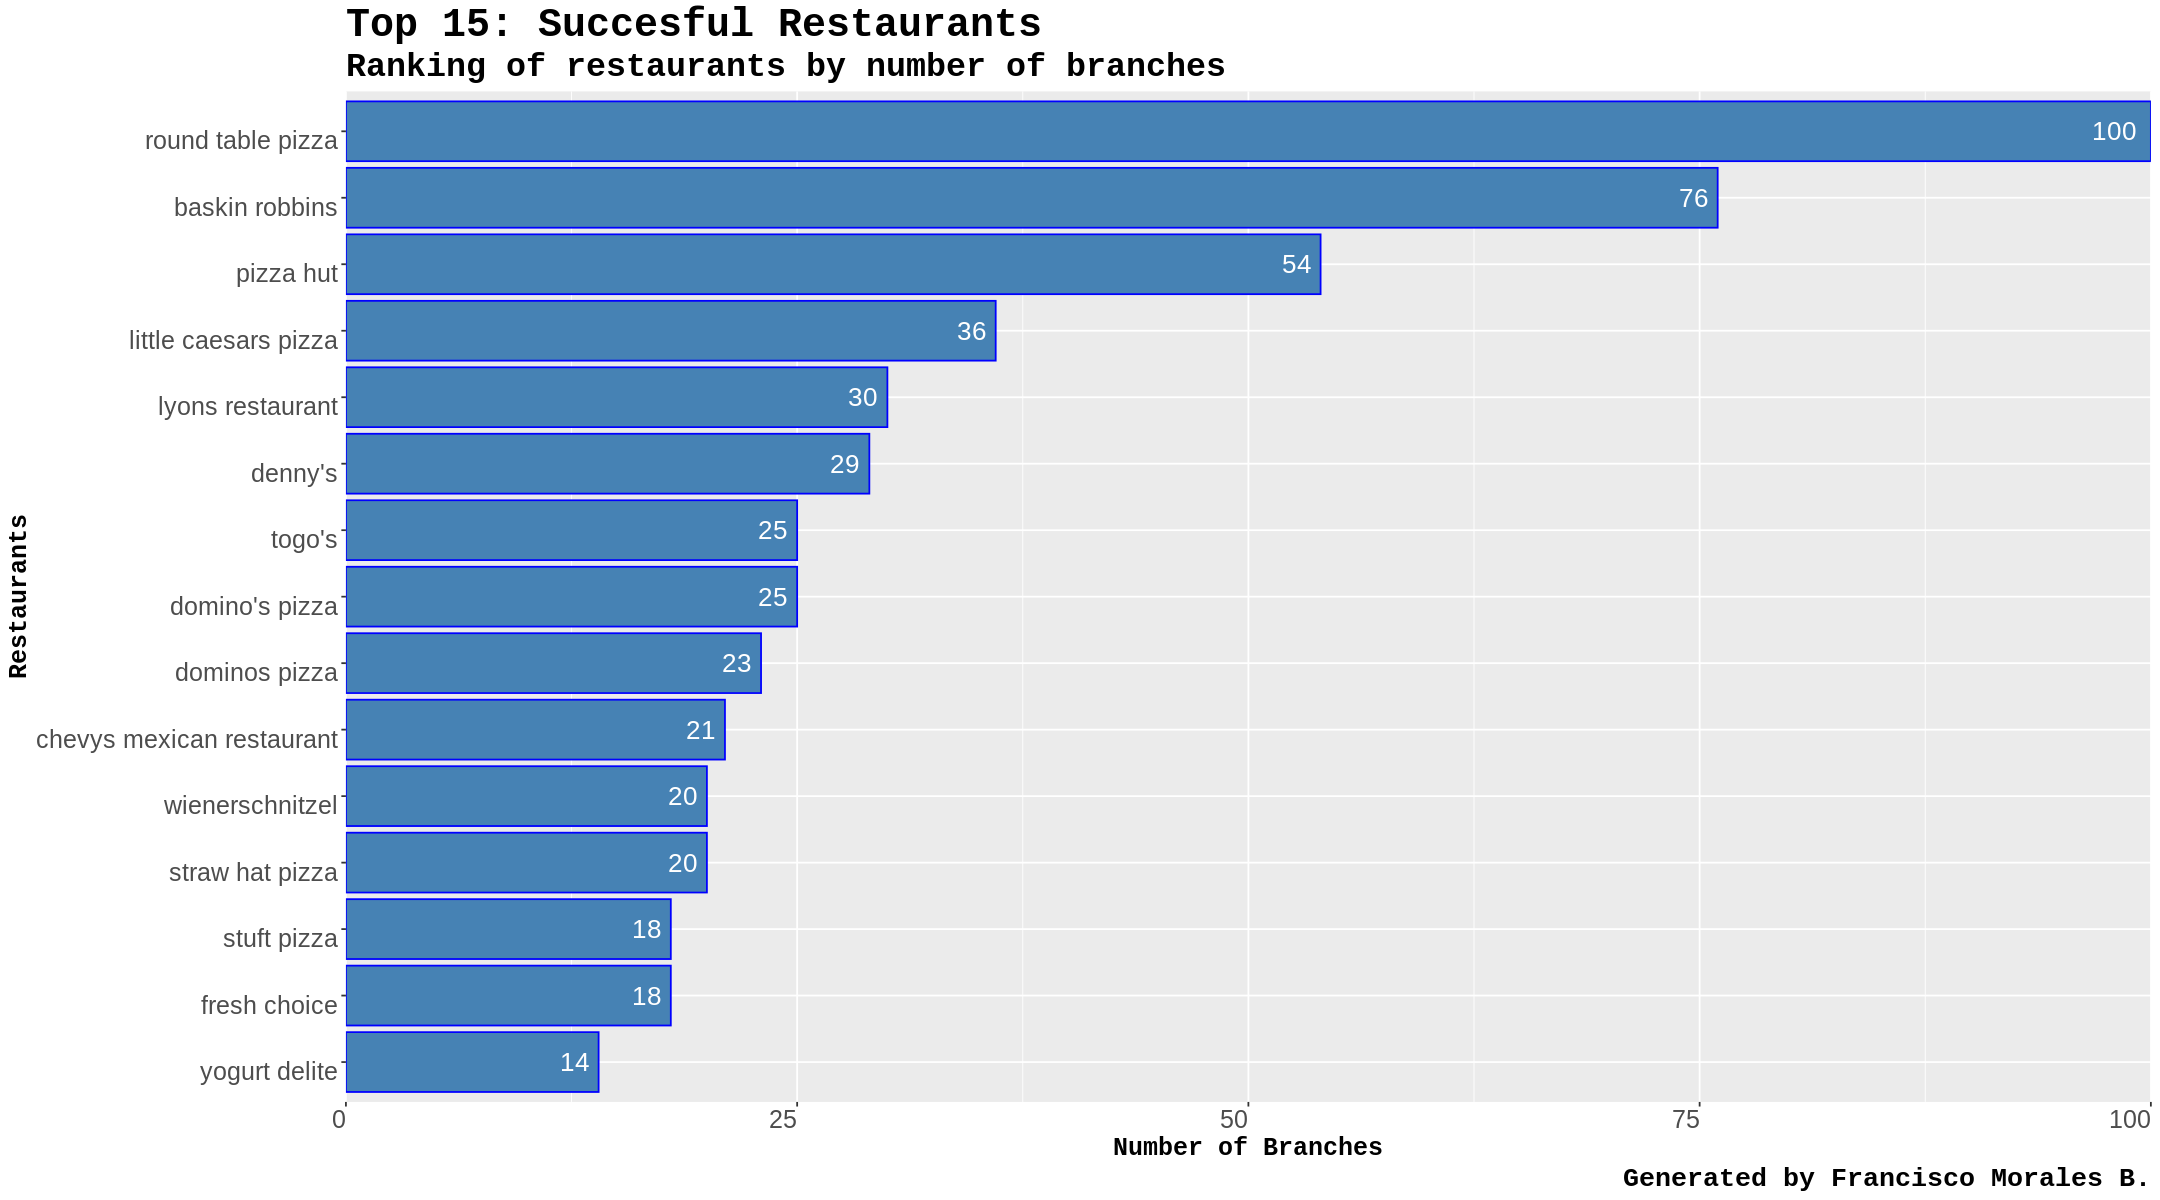

In [14]:
#We start our plot using ggplot command:
graf1 %>% ggplot () + 
#rearrange the plot according the number of branches
  aes (x = reorder(label, n), y = n) + 
#built the bar chart in blue color
    geom_bar(stat="identity", color="blue", fill = "steelblue") +
#give the text parameters (inside and outside the bars)
      geom_text(aes(label= n), hjust= 1.3, color="white", size=5.5)+
#create the plot text
        labs(title='Top 15: Succesful Restaurants', 
          subtitle='Ranking of restaurants by number of branches', 
             caption='Generated by Francisco Morales B.')+
                theme(title = element_text(family='Anton', face='bold', size= 20) )+
                  xlab('Restaurants') +
                      ylab('Number of Branches')+
                          theme(axis.title.x = element_text(family='Anton', face='bold', hjust=0.5, size= 15) )+
                              theme(axis.title.y = element_text(family='Anton', face='bold', size= 15) )+
#Finally we adjust some parameters to create a graph with a suitable scale
                        theme(axis.text.x=element_text(angle = 0, vjust =1,hjust = 1, size = 15))+
                          theme(axis.text.y=element_text(angle = 0, vjust =1,hjust = 1, size = 15))+
                                   coord_flip() +
                                     scale_y_continuous(expand = expansion(mult = c(0, 0)))
                                      
#Luego de tener el gráfico listo lo que realizamos es permitir su reproducción en un tamaño mayor para no tener dificultades de lectura                                     
options(repr.plot.width=18, repr.plot.height=10)

#Conclusion

This was just a glimpse of what we can do in R with databases, play around with tables, and how we can make nice graphs to display results.

Obviously, this can be extrapolated to other areas, but it's always fun to apply some knowledge to things we can enjoy... And food is on the top of the list!!